This notebook explores COVID-19 testing data using a dataset derived from the Johns Hopkins University (JHU) and COVID Tracking Project (CTP). This notebook can be found in the repository:


The notebook is organized into 2 segments.


1. Data import, cleaning and profiling
2. New York state Analysis

Source links:

1. Data repository: https://github.com/govex/COVID-19/tree/master/data_tables/testing_data
2. API endpoint for testing data: https://jhucoronavirus.azureedge.net/api/v1/testing/daily.json




Installing required libraries

In [1]:
#pip install requests
#pip install pandas
#pip install matplotlib
#pip install seaborn

Importing required packages

In [106]:
import pandas as pd
import requests
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

##Data import, cleaning and profiling

Getting data from API

In [3]:
api_url = "https://jhucoronavirus.azureedge.net/api/v1/testing/daily.json"
response = requests.get(api_url)
response.raise_for_status()

In [14]:
testing_data = response.json()

Load JSON API response into DataFrame

In [15]:
testing_df = pd.DataFrame(testing_data)

In [11]:
testing_df.head()

,date,state,people_viral_positive,tests_viral_positive,tests_viral_negative,encounters_viral_total,tests_viral_total,people_viral_total,tests_combined_total,cases_conf_probable,people_antigen_positive,people_antigen_total,cases_confirmed,cases_probable
0,20200306,AK,NaN,NaN,NaN,NaN,8.0,NaN,8.0,NaN,NaN,NaN,NaN,NaN
1,20200307,AK,NaN,NaN,NaN,NaN,12.0,NaN,12.0,NaN,NaN,NaN,NaN,NaN
2,20200308,AK,NaN,NaN,NaN,NaN,14.0,NaN,14.0,NaN,NaN,NaN,NaN,NaN
3,20200309,AK,NaN,NaN,NaN,NaN,23.0,NaN,23.0,NaN,NaN,NaN,NaN,NaN
4,20200310,AK,NaN,NaN,NaN,NaN,23.0,NaN,23.0,NaN,NaN,NaN,NaN,NaN


In [12]:
testing_df.tail()

,date,state,people_viral_positive,tests_viral_positive,tests_viral_negative,encounters_viral_total,tests_viral_total,people_viral_total,tests_combined_total,cases_conf_probable,people_antigen_positive,people_antigen_total,cases_confirmed,cases_probable
36623,20211215,VT,54862.0,NaN,NaN,NaN,2711652.0,559850.0,2711652.0,56661.0,NaN,NaN,54862.0,1799.0
36624,20211215,WA,699633.0,734205.0,10118939.0,9958651.0,NaN,NaN,9958651.0,796369.0,NaN,NaN,699633.0,96736.0
36625,20211215,WI,928112.0,NaN,NaN,12813229.0,NaN,4657288.0,12813229.0,1043693.0,NaN,NaN,928112.0,115581.0
36626,20211215,WV,241479.0,NaN,NaN,NaN,4696447.0,NaN,4765213.0,310245.0,NaN,NaN,241479.0,68766.0
36627,20211215,WY,89739.0,60642.0,1088213.0,NaN,1175713.0,261148.0,1175713.0,113359.0,NaN,NaN,89739.0,23620.0


In [13]:
shape = testing_df.shape
print(f"Number of rows: {shape[0]} \nNumber of columns: {shape[1]}")

Number of rows: 36628 
Number of columns: 14


In [16]:
print("List of Column names: ")
testing_df.columns.to_list()

List of Column names: 


['date',
 'state',
 'people_viral_positive',
 'tests_viral_positive',
 'tests_viral_negative',
 'encounters_viral_total',
 'tests_viral_total',
 'people_viral_total',
 'tests_combined_total',
 'cases_conf_probable',
 'people_antigen_positive',
 'people_antigen_total',
 'cases_confirmed',
 'cases_probable']

In [20]:
print(testing_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36628 entries, 0 to 36627
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   date                     36628 non-null  int64  
 1   state                    36628 non-null  object 
 2   people_viral_positive    33176 non-null  float64
 3   tests_viral_positive     17036 non-null  float64
 4   tests_viral_negative     10165 non-null  float64
 5   encounters_viral_total   9188 non-null   float64
 6   tests_viral_total        27846 non-null  float64
 7   people_viral_total       16198 non-null  float64
 8   tests_combined_total     36417 non-null  float64
 9   cases_conf_probable      36321 non-null  float64
 10  people_antigen_positive  1482 non-null   float64
 11  people_antigen_total     2165 non-null   float64
 12  cases_confirmed          13945 non-null  float64
 13  cases_probable           13944 non-null  float64
dtypes: float64(12), int64(

The info() output shows that the dataset has 36,628 rows and 14 columns.
The date column is stored as an integer, so it needs to be converted into a real date format. The state column is a text column with state abbreviations. Most of the remaining columns are numeric (float64), but many have substantial missing values, indicating inconsistent reporting across states. The dataset uses around 3.9 MB of memory.

Convert the date column from int64 (YYYYMMDD) to datetime format

In [21]:
testing_df['date'] = pd.to_datetime(testing_df['date'].astype(str), format='%Y%m%d')


In [22]:
testing_df.dtypes

,0
date,datetime64[ns]
state,object
people_viral_positive,float64
tests_viral_positive,float64
tests_viral_negative,float64
encounters_viral_total,float64
tests_viral_total,float64
people_viral_total,float64
tests_combined_total,float64
cases_conf_probable,float64


In [23]:
testing_df.head()

,date,state,people_viral_positive,tests_viral_positive,tests_viral_negative,encounters_viral_total,tests_viral_total,people_viral_total,tests_combined_total,cases_conf_probable,people_antigen_positive,people_antigen_total,cases_confirmed,cases_probable
0,2020-03-06,AK,NaN,NaN,NaN,NaN,8.0,NaN,8.0,NaN,NaN,NaN,NaN,NaN
1,2020-03-07,AK,NaN,NaN,NaN,NaN,12.0,NaN,12.0,NaN,NaN,NaN,NaN,NaN
2,2020-03-08,AK,NaN,NaN,NaN,NaN,14.0,NaN,14.0,NaN,NaN,NaN,NaN,NaN
3,2020-03-09,AK,NaN,NaN,NaN,NaN,23.0,NaN,23.0,NaN,NaN,NaN,NaN,NaN
4,2020-03-10,AK,NaN,NaN,NaN,NaN,23.0,NaN,23.0,NaN,NaN,NaN,NaN,NaN


In [24]:
testing_df.describe()

,date,people_viral_positive,tests_viral_positive,tests_viral_negative,encounters_viral_total,tests_viral_total,people_viral_total,tests_combined_total,cases_conf_probable,people_antigen_positive,people_antigen_total,cases_confirmed,cases_probable
count,36628,3.317600e+04,1.703600e+04,1.016500e+04,9.188000e+03,2.784600e+04,1.619800e+04,3.641700e+04,3.632100e+04,1482.000000,2.165000e+03,1.394500e+04,13944.000000
mean,2021-01-22 08:21:10.634487040,3.790848e+05,4.318515e+05,3.823510e+06,6.631937e+06,5.432242e+06,1.737529e+06,5.424406e+06,3.855561e+05,64240.545884,4.129541e+05,6.252463e+05,66616.499211
min,2020-01-13 00:00:00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,3.000000,3.000000e+00,0.000000e+00,0.000000
25%,2020-08-12 00:00:00,3.309925e+04,4.580800e+04,8.012060e+05,6.925688e+05,4.839052e+05,2.565612e+05,3.765340e+05,2.102200e+04,27752.750000,1.602910e+05,1.281000e+05,0.000000
50%,2021-01-22 00:00:00,1.460960e+05,1.924800e+05,2.473541e+06,2.497510e+06,2.206154e+06,8.164770e+05,1.845335e+06,1.352330e+05,65291.500000,3.557740e+05,4.001880e+05,17282.000000
75%,2021-07-05 00:00:00,4.712642e+05,5.724602e+05,4.521318e+06,7.862398e+06,5.769762e+06,2.332996e+06,6.034682e+06,4.790360e+05,88501.250000,5.851890e+05,7.590620e+05,106439.000000
max,2021-12-15 00:00:00,4.896401e+06,4.393776e+06,4.024120e+07,8.388496e+07,1.157405e+08,1.337491e+07,1.157405e+08,4.896401e+06,170373.000000,1.305786e+06,4.896401e+06,749056.000000
std,NaN,6.275464e+05,6.738457e+05,5.487488e+06,1.172307e+07,1.029309e+07,2.338632e+06,1.068108e+07,6.468026e+05,44312.597177,3.156144e+05,7.974845e+05,103680.975507


Scientific notation appears in numerical columns. Set pandas display option to show floats in standard decimal format

In [25]:
pd.set_option('display.float_format', '{:.2f}'.format)

In [26]:
testing_df.describe()

,date,people_viral_positive,tests_viral_positive,tests_viral_negative,encounters_viral_total,tests_viral_total,people_viral_total,tests_combined_total,cases_conf_probable,people_antigen_positive,people_antigen_total,cases_confirmed,cases_probable
count,36628,33176.00,17036.00,10165.00,9188.00,27846.00,16198.00,36417.00,36321.00,1482.00,2165.00,13945.00,13944.00
mean,2021-01-22 08:21:10.634487040,379084.84,431851.53,3823509.63,6631937.20,5432241.70,1737529.43,5424406.35,385556.07,64240.55,412954.09,625246.26,66616.50
min,2020-01-13 00:00:00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,3.00,3.00,0.00,0.00
25%,2020-08-12 00:00:00,33099.25,45808.00,801206.00,692568.75,483905.25,256561.25,376534.00,21022.00,27752.75,160291.00,128100.00,0.00
50%,2021-01-22 00:00:00,146096.00,192480.00,2473541.00,2497509.50,2206154.50,816477.00,1845335.00,135233.00,65291.50,355774.00,400188.00,17282.00
75%,2021-07-05 00:00:00,471264.25,572460.25,4521318.00,7862398.50,5769762.00,2332995.75,6034682.00,479036.00,88501.25,585189.00,759062.00,106439.00
max,2021-12-15 00:00:00,4896401.00,4393776.00,40241199.00,83884958.00,115740483.00,13374909.00,115740483.00,4896401.00,170373.00,1305786.00,4896401.00,749056.00
std,NaN,627546.45,673845.70,5487487.75,11723072.78,10293086.42,2338632.39,10681075.45,646802.64,44312.60,315614.41,797484.55,103680.98


The describe() output provides basic summary statistics, but it does not offer a full overview of the dataset. A key observation from the date field is that the data ranges from January 13, 2020 to December 15, 2021, representing nearly two years of COVID-19 testing information.

In [27]:
testing_df.nunique()

,0
date,703
state,56
people_viral_positive,26724
tests_viral_positive,14157
tests_viral_negative,8202
encounters_viral_total,8155
tests_viral_total,22574
people_viral_total,12945
tests_combined_total,30525
cases_conf_probable,28562


Using .nunique(), the state column shows 56 unique values. Because the U.S. has only 50 states, this could potentially indicate data inconsistencies. To confirm, I printed the unique state values.

In [18]:
print(testing_df['state'].unique())

['AK' 'AL' 'AR' 'AS' 'AZ' 'CA' 'CO' 'CT' 'DC' 'DE' 'FL' 'GA' 'GU' 'HI'
 'IA' 'ID' 'IL' 'IN' 'KS' 'KY' 'LA' 'MA' 'MD' 'ME' 'MI' 'MN' 'MO' 'MP'
 'MS' 'MT' 'NC' 'ND' 'NE' 'NH' 'NJ' 'NM' 'NV' 'NY' 'OH' 'OK' 'OR' 'PA'
 'PR' 'RI' 'SC' 'SD' 'TN' 'TX' 'UT' 'VA' 'VI' 'VT' 'WA' 'WI' 'WV' 'WY']


After inspecting state.unique(), the state column has 50 states + 1 Federal district (DC) + 5 territories, so there is no inconsistency.

In [19]:
print(testing_df.duplicated().sum())

0


There are no duplicates

It is evident from info() that data has many null values across columns. The code below counts how many nulls each column has

In [18]:
testing_df.isnull().sum()

,0
date,0
state,0
people_viral_positive,3452
tests_viral_positive,19592
tests_viral_negative,26463
encounters_viral_total,27440
tests_viral_total,8782
people_viral_total,20430
tests_combined_total,211
cases_conf_probable,307


To understand the missing values more clearly, the next cell calculates the percentage of null values in each column. This helps show which columns are mostly complete and which ones have a lot of missing data

In [28]:
sum_nulls = testing_df.isna().sum()
percent_of_nulls = sum_nulls/len(testing_df) * 100
print(percent_of_nulls.sort_values(ascending= False))

people_antigen_positive   95.95
people_antigen_total      94.09
encounters_viral_total    74.92
tests_viral_negative      72.25
cases_probable            61.93
cases_confirmed           61.93
people_viral_total        55.78
tests_viral_positive      53.49
tests_viral_total         23.98
people_viral_positive      9.42
cases_conf_probable        0.84
tests_combined_total       0.58
date                       0.00
state                      0.00
dtype: float64


Looking at the percentage of missing values in each column, we can make several observations:
1. people_antigen_positive (95.95%), people_antigen_total (94.09%) are mostly empty. This means antigen-related data was rarely reported across states. These variables are not reliable and may need to be dropped from further analysis.
2. encounters_viral_total (74.92%), tests_viral_negative (72.25%), cases_probable (61.93%), cases_confirmed (61.93%), people_viral_total (55.78%), tests_viral_positive (53.49%)

    More than half the dataset is missing values.This indicates inconsistent reporting for these metrics. They may still be useful for certain states but not for nationwide analysis. State level interpretation is required to better understand.
3. tests_combined_total (0.58 %) is almost fully populated, hence it is most reliable for analysis.

Since states differ in how they report testing data, the table below shows the percentage of null values for each column across all states. This allows us to see which metrics are consistently reported and which ones are missing for specific states.

In [29]:
statewise_nulls_in_percentage = testing_df.isna().groupby(testing_df['state']).mean() * 100
statewise_nulls_in_percentage


,date,state,people_viral_positive,tests_viral_positive,tests_viral_negative,encounters_viral_total,tests_viral_total,people_viral_total,tests_combined_total,cases_conf_probable,people_antigen_positive,people_antigen_total,cases_confirmed,cases_probable
state,,,,,,,,,,,,,,
AK,0.00,0.00,1.69,23.54,23.54,100.00,0.00,100.00,0.00,1.69,100.00,100.00,61.38,61.38
AL,0.00,0.00,0.00,100.00,100.00,100.00,0.00,100.00,0.00,0.00,100.00,100.00,61.33,61.33
AR,0.00,0.00,0.00,100.00,24.92,100.00,0.00,100.00,0.00,0.00,30.15,30.15,61.38,61.38
AS,0.00,0.00,47.19,100.00,100.00,100.00,0.00,100.00,0.00,19.38,100.00,100.00,77.81,77.81
AZ,0.00,0.00,15.18,99.85,100.00,100.00,0.00,0.00,0.00,0.00,100.00,100.00,61.50,61.50
CA,0.00,0.00,8.59,100.00,100.00,100.00,0.00,100.00,0.00,0.00,100.00,100.00,61.50,61.50
CO,0.00,0.00,7.67,100.00,100.00,1.07,100.00,1.99,1.07,0.00,100.00,100.00,61.50,61.50
CT,0.00,0.00,14.18,0.00,0.00,100.00,0.00,100.00,0.00,1.07,100.00,100.00,61.74,61.74
DC,0.00,0.00,0.00,100.00,100.00,0.00,100.00,12.14,0.00,0.00,100.00,100.00,61.44,61.44


The next cell shows how many states have more than 90% null values in each column. This helps identify which variables are rarely reported across states and may not be useful for analysis

In [31]:
(statewise_nulls_in_percentage>90).sum()


,0
date,0
state,0
people_viral_positive,0
tests_viral_positive,28
tests_viral_negative,37
encounters_viral_total,42
tests_viral_total,10
people_viral_total,27
tests_combined_total,0
cases_conf_probable,0


people_viral_positive, tests_combined_total, cases_conf_probable, cases_confirmed, cases_probable. These columns are consistently reported across all states and contain reliable information.
They are good candidates for analysis.

##New York State Data Analysis

Filtering New York data from the testing_df

In [33]:
df_newyork = testing_df[testing_df["state"] == "NY"].copy()

Saving the New York data into a CSV file with filename:

In [35]:
df_newyork.to_csv("newyork_covid_testing_data.csv", index=False)


Reading data from the newly created CSV file for New York State

In [36]:
df_newyork = pd.read_csv("newyork_covid_testing_data.csv")

Data profiling for New York State

In [38]:
shape = df_newyork.shape
print(f"Number of rows: {shape[0]} \nNumber of columns: {shape[1]}")

Number of rows: 654 
Number of columns: 14


In [40]:
df_newyork.dtypes

,0
date,object
state,object
people_viral_positive,float64
tests_viral_positive,float64
tests_viral_negative,float64
encounters_viral_total,float64
tests_viral_total,float64
people_viral_total,float64
tests_combined_total,float64
cases_conf_probable,float64


Convert the date column from object to datetime format

In [41]:
df_newyork['date'] = pd.to_datetime(df_newyork['date'].astype(str))


In [44]:
df_newyork.dtypes

,0
date,datetime64[ns]
state,object
people_viral_positive,float64
tests_viral_positive,float64
tests_viral_negative,float64
encounters_viral_total,float64
tests_viral_total,float64
people_viral_total,float64
tests_combined_total,float64
cases_conf_probable,float64


In [42]:
df_newyork.head()

,date,state,people_viral_positive,tests_viral_positive,tests_viral_negative,encounters_viral_total,tests_viral_total,people_viral_total,tests_combined_total,cases_conf_probable,people_antigen_positive,people_antigen_total,cases_confirmed,cases_probable
0,2020-03-02,NY,0.00,NaN,NaN,0.00,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
1,2020-03-03,NY,1.00,NaN,NaN,1.00,NaN,NaN,1.00,1.00,NaN,NaN,NaN,NaN
2,2020-03-04,NY,1.00,NaN,NaN,10.00,NaN,NaN,10.00,1.00,NaN,NaN,NaN,NaN
3,2020-03-05,NY,3.00,NaN,NaN,30.00,NaN,NaN,30.00,3.00,NaN,NaN,NaN,NaN
4,2020-03-06,NY,25.00,NaN,NaN,122.00,NaN,NaN,122.00,25.00,NaN,NaN,NaN,NaN


In [51]:
df_newyork.tail()

,date,state,people_viral_positive,tests_viral_positive,tests_viral_negative,encounters_viral_total,tests_viral_total,people_viral_total,tests_combined_total,cases_conf_probable,people_antigen_positive,people_antigen_total,cases_confirmed,cases_probable,daily_tests
649,2021-12-11,NY,2814725.00,NaN,NaN,83079987.00,NaN,NaN,83079987.00,2814725.00,NaN,NaN,2814725.00,0.00,273607.00
650,2021-12-12,NY,2826302.00,NaN,NaN,83329780.00,NaN,NaN,83329780.00,2826302.00,NaN,NaN,2826302.00,0.00,249793.00
651,2021-12-13,NY,2835295.00,NaN,NaN,83509484.00,NaN,NaN,83509484.00,2835295.00,NaN,NaN,2835295.00,0.00,179704.00
652,2021-12-14,NY,2843561.00,NaN,NaN,83652449.00,NaN,NaN,83652449.00,2843561.00,NaN,NaN,2843561.00,0.00,142965.00
653,2021-12-15,NY,2856505.00,NaN,NaN,83884958.00,NaN,NaN,83884958.00,2856505.00,NaN,NaN,2856505.00,0.00,232509.00


The next cell shows the percentage of missing values in each column for New York.
It tells you which columns NY reports well and which ones NY barely reports at all. It helps to decide which columns to keep or drop before analysis.

In [43]:
df_newyork.isna().groupby(df_newyork['state']).mean() * 100

,date,state,people_viral_positive,tests_viral_positive,tests_viral_negative,encounters_viral_total,tests_viral_total,people_viral_total,tests_combined_total,cases_conf_probable,people_antigen_positive,people_antigen_total,cases_confirmed,cases_probable
state,,,,,,,,,,,,,,
NY,0.00,0.00,0.00,100.00,100.00,0.00,100.00,100.00,0.00,0.00,100.00,100.00,61.62,61.62


NYS does not report (100% missing values) tests_viral_positive, tests_viral_negative, tests_viral_total, people_viral_total, people_antigen_positive, people_antigen_total. Hence these can be dropped.

In [117]:
df_newyork.describe()

,people_viral_positive,tests_viral_positive,tests_viral_negative,encounters_viral_total,tests_viral_total,people_viral_total,tests_combined_total,cases_conf_probable,people_antigen_positive,people_antigen_total,cases_confirmed,cases_probable
count,654.00,0.00,0.00,654.00,0.00,0.00,654.00,654.00,0.00,0.00,251.00,251.00
mean,1292876.58,NaN,NaN,33822544.06,NaN,NaN,33822544.06,1292876.58,NaN,NaN,2275026.57,0.00
std,890916.60,NaN,NaN,27272710.04,NaN,NaN,27272710.04,890916.60,NaN,NaN,238736.46,0.00
min,0.00,NaN,NaN,0.00,NaN,NaN,0.00,0.00,NaN,NaN,1927357.00,0.00
25%,422887.25,NaN,NaN,6750456.00,NaN,NaN,6750456.00,422887.25,NaN,NaN,2090803.00,0.00
50%,1307374.00,NaN,NaN,30162004.00,NaN,NaN,30162004.00,1307374.00,NaN,NaN,2175217.00,0.00
75%,2099584.00,NaN,NaN,59168811.75,NaN,NaN,59168811.75,2099584.00,NaN,NaN,2467765.50,0.00
max,2856505.00,NaN,NaN,83884958.00,NaN,NaN,83884958.00,2856505.00,NaN,NaN,2856505.00,0.00


The below code calculates the average for the variable tests_combined_total for New York.


In [45]:
avg_tests_combined_total = df_newyork['tests_combined_total'].mean()

In [47]:
print(f"average for the variable tests_combined_total for NY: {avg_tests_combined_total}")

average for the variable tests_combined_total for NY: 33822544.056574926


The above mean is the simple arithmetic mean of the tests_combined_total column. This represents the average level of the running cumulative total over the period (March 2, 2020 to December 15, 2021). It is about the level of the accumulated total, not about how many tests were done per day. In other words, it describes the average cumulative number of people tested during the period and reflects the typical "total tests so far" across the days.

For New York State, tests_combined_total is derived from encounters_viral_total. [source](https://github.com/govex/COVID-19/blob/master/data_tables/testing_data/tests_combined_total_source.csv)

According to the [data dictionary](https://github.com/govex/COVID-19/blob/master/data_tables/testing_data/time_series_covid19_US_data_dictionary.csv), encounters_viral_total is defined as:

  Cumulative number of people tested per day via PCR testing or other approved nucleic acid amplification test (NAAT)

Since tests_combined_total is a cumulative value column, a simple mean over this cumulative column is not a very informative mean metric. A more meaningful quantity is the average number of new tests performed per day.

We first convert the cumulative totals into daily counts:


In [98]:
df_newyork["daily_tests"] = df_newyork["tests_combined_total"].diff()
df_newyork[[ "daily_tests", "tests_combined_total"]]

,daily_tests,tests_combined_total
0,NaN,0.00
1,1.00,1.00
2,9.00,10.00
3,20.00,30.00
4,92.00,122.00
...,...,...
649,273607.00,83079987.00
650,249793.00,83329780.00
651,179704.00,83509484.00
652,142965.00,83652449.00


The diff() function computes the day-to-day change in the cumulative series, which gives the number of new tests on each day. For the first day, the difference is undefined, so diff() sets daily_tests to NaN. We replace this NaN with the first day's cumulative value, which corresponds to assuming that the total number of tests before the first date in the series is 0

In [99]:
df_newyork["daily_tests"] = df_newyork["daily_tests"].fillna(df_newyork["tests_combined_total"])
df_newyork[[ "daily_tests", "tests_combined_total"]]

,daily_tests,tests_combined_total
0,0.00,0.00
1,1.00,1.00
2,9.00,10.00
3,20.00,30.00
4,92.00,122.00
...,...,...
649,273607.00,83079987.00
650,249793.00,83329780.00
651,179704.00,83509484.00
652,142965.00,83652449.00



Now we compute the mean of the daily tests:

In [96]:
average_daily_tests = df_newyork['daily_tests'].mean()
print(f"Average of the daily tests: {average_daily_tests}")

Average of the daily tests: 128264.4617737003


This mean describes the average number of new tests performed per day over the period.

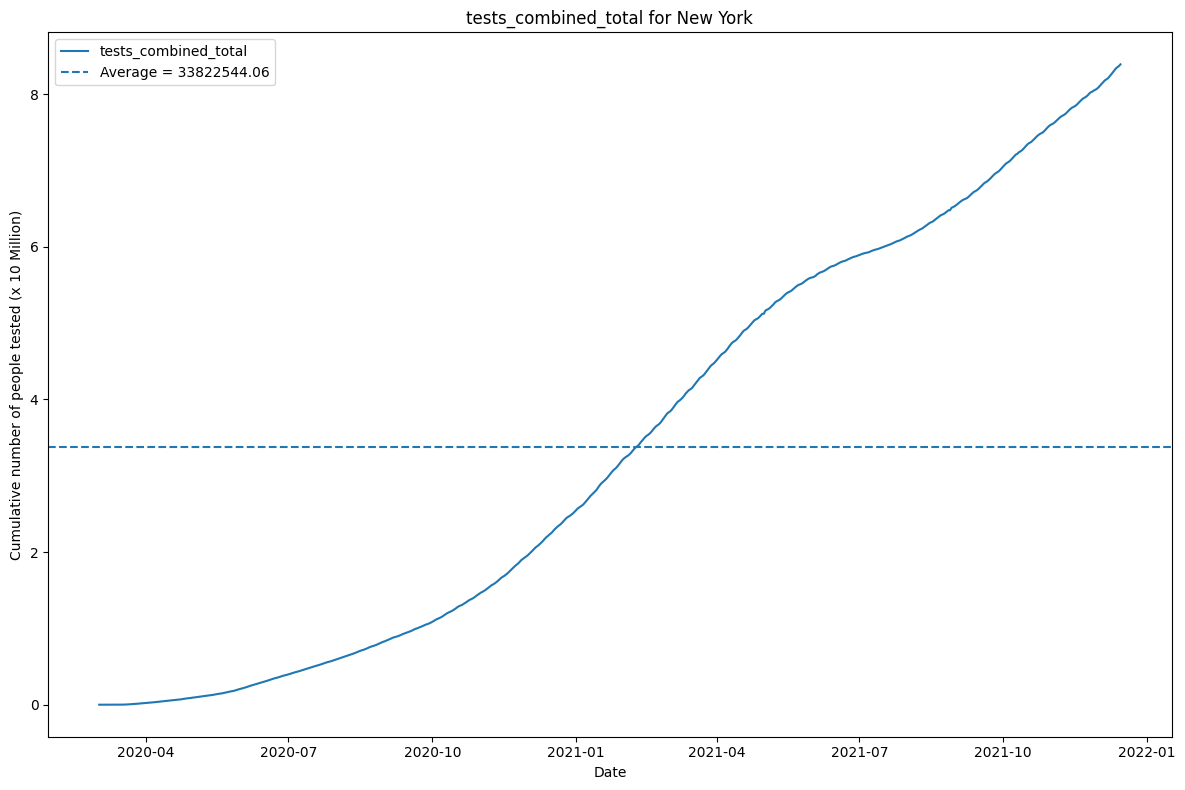

In [127]:
scale = 10000000  # 10 million as a scale factor is choosen because tests_combined_total is on the order of 10^7
plt.figure(figsize=(12,8))
plt.plot(df_newyork["date"],df_newyork["tests_combined_total"]/scale,label="tests_combined_total")
plt.axhline(y=avg_tests_combined_total/scale,linestyle="--",label=f"Average = {avg_tests_combined_total:.2f}")
plt.title("tests_combined_total for New York")
plt.xlabel("Date")
plt.ylabel("Cumulative number of people tested (x 10 Million)")
plt.legend()
plt.tight_layout()
plt.show()

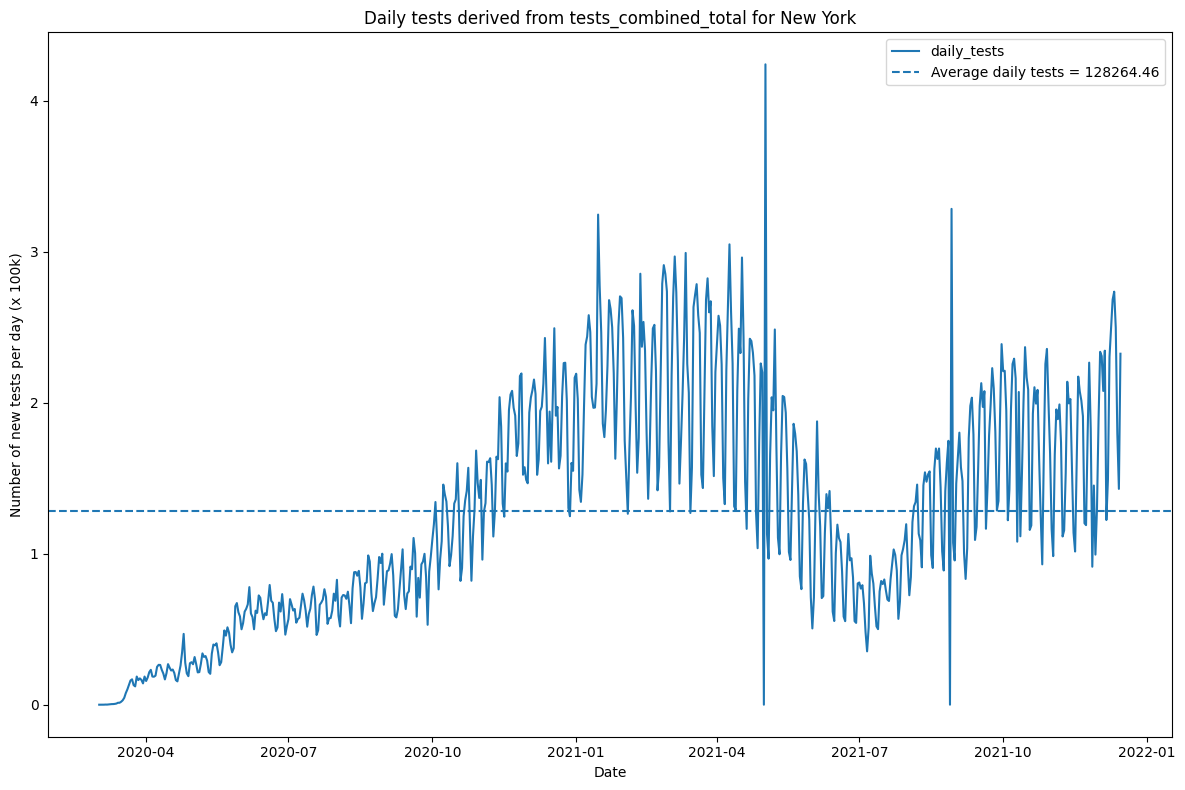

In [135]:
plt.figure(figsize=(12,8))
plt.plot(df_newyork["date"],df_newyork["daily_tests"],label="daily_tests")
plt.axhline(y=average_daily_tests,linestyle="--",label=f"Average daily tests = {average_daily_tests:.2f}")
plt.title("Daily tests derived from tests_combined_total for New York")
plt.xlabel("Date")
plt.ylabel("Number of new tests per day (x 100k)")
plt.legend()
plt.tight_layout()
plt.show()

Instead of using one overall average for the whole period, I calculate a 7-day rolling average of daily_tests. This smooths out the ups and downs from one day to the next and makes it easier to see how testing levels are rising or falling over time.

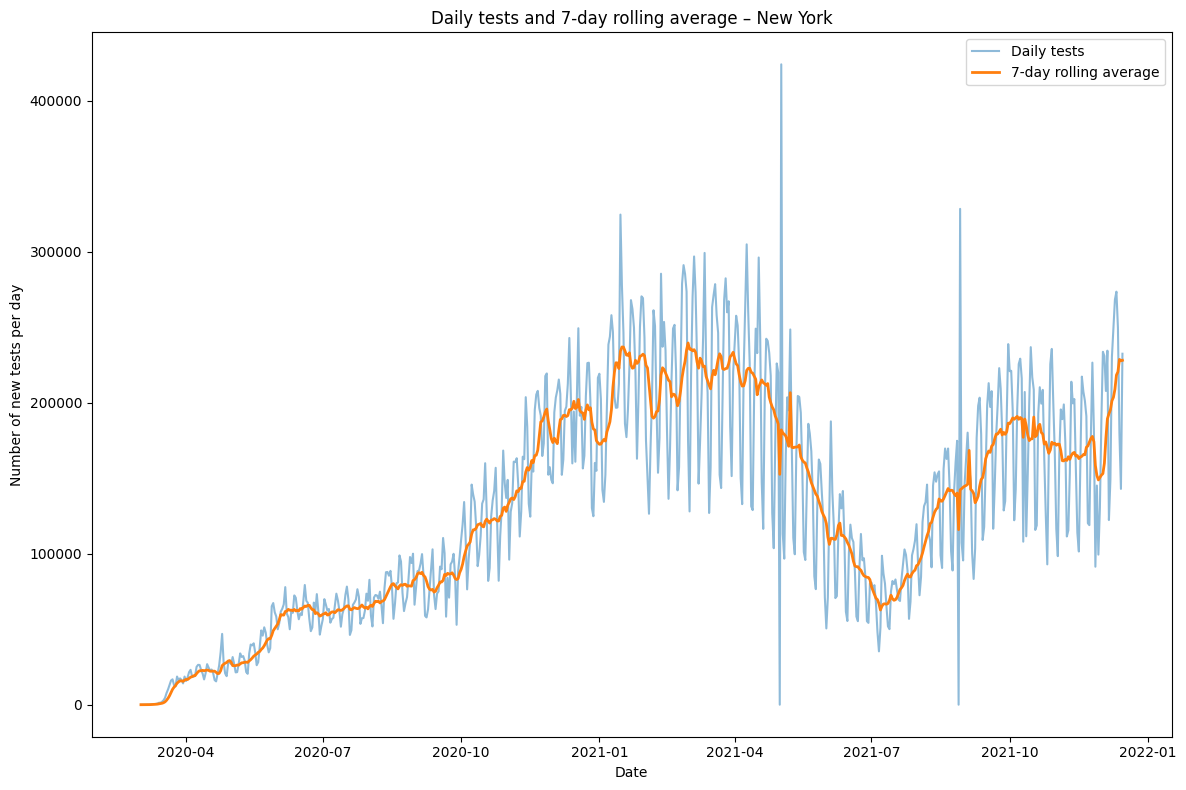

In [138]:
df_newyork["daily_tests_7day_avg"] = df_newyork["daily_tests"].rolling(window=7, min_periods=1).mean()
plt.figure(figsize=(12,8))
plt.plot(df_newyork["date"], df_newyork["daily_tests"], alpha=0.5, label="Daily tests")
plt.plot(df_newyork["date"], df_newyork["daily_tests_7day_avg"], linewidth=2, label="7-day rolling average")
plt.title("Daily tests and 7-day rolling average – New York")
plt.xlabel("Date")
plt.ylabel("Number of new tests per day")
plt.legend()
plt.tight_layout()
plt.show()
